In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from google.colab import files
uploaded =files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [3]:
data = pd.read_csv("Salary_Data.csv")

In [4]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [5]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [8]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [9]:
data[data.duplicated()]

,YearsExperience,Salary


In [10]:
data = data.rename({'YearsExperience':'YOEXP'},axis=1)

In [11]:
data

,YOEXP,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Data Visualisation

<Axes: >

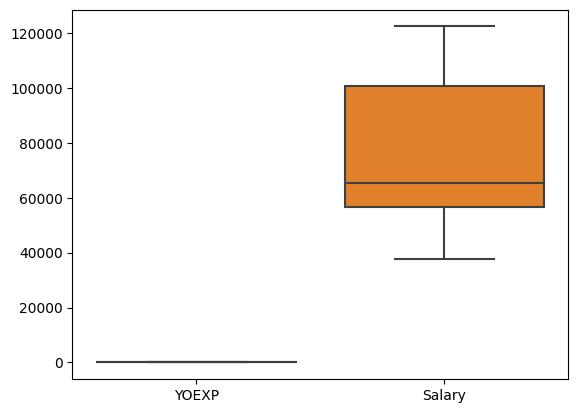

In [12]:
sns.boxplot(data)

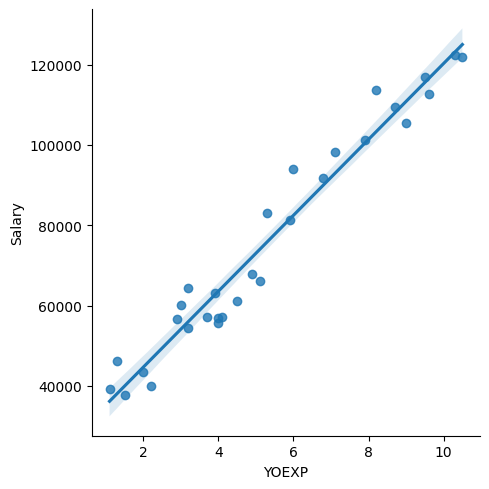

In [13]:
sns.lmplot(data,x='YOEXP',y= 'Salary')

Correlation

In [14]:
data.corr()

,YOEXP,Salary
YOEXP,1.000000,0.978242
Salary,0.978242,1.000000


Model_Building

In [16]:
import statsmodels.formula.api as smf
model = smf.ols('Salary~YOEXP',data).fit()

Model_Testing

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        11:03:17   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YOEXP       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#Params
model.params

Intercept    25792.200199
YOEXP         9449.962321
dtype: float64

In [27]:
#tvalue
model.tvalues

Intercept    11.346940
YOEXP        24.950094
dtype: float64

In [28]:
#pvalue

In [29]:
model.pvalues

Intercept    5.511950e-12
YOEXP        1.143068e-20
dtype: float64

Prediction For Salary_Hike

In [30]:
newsal = pd.Series([5,2,4,9])
newsal

0    5
1    2
2    4
3    9
dtype: int64

In [31]:
pred_sal = pd.DataFrame(newsal,columns = ['YOEXP'])

In [32]:
model.predict(pred_sal)

0     73042.011806
1     44692.124842
2     63592.049484
3    110841.861092
dtype: float64

In [33]:
pred_sal['Pre_salary']=model.predict(pred_sal)

In [34]:
pred_sal

,YOEXP,Pre_salary
0,5,73042.011806
1,2,44692.124842
2,4,63592.049484
3,9,110841.861092


In [35]:
round(pred_sal)

,YOEXP,Pre_salary
0,5,73042.0
1,2,44692.0
2,4,63592.0
3,9,110842.0


<Axes: xlabel='YOEXP', ylabel='Pre_salary'>

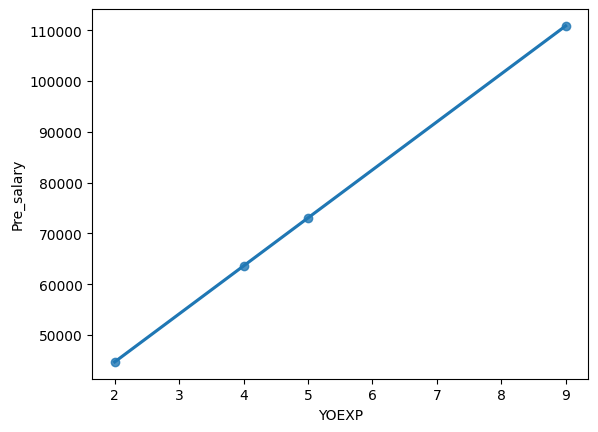

In [36]:
#Scatter plot of predicted Salary
sns.regplot(x='YOEXP',y = 'Pre_salary',data = pred_sal)

Building the model By Transformation

Normalisation

In [37]:
from sklearn.preprocessing import MinMaxScaler
data_new = data
mms = MinMaxScaler()
data_new_scale = pd.DataFrame(mms.fit_transform(data_new))
x = data_new_scale.iloc[:,0]
y = data_new_scale.iloc[:,-1]

In [38]:
model = smf.ols('y~x', data = data_new).fit()

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        11:13:16   Log-Likelihood:                 38.951
No. Observations:                  30   AIC:                            -73.90
Df Residuals:                      28   BIC:                            -71.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0182      0.023     -0.807      0.427      -0.065       0.028
x              1.0493      0.042     24.950      0.000       0.963       1.135
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         4.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Standardization


In [40]:
data_new_1 = data_new
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data_new_1_scale = pd.DataFrame(ss.fit_transform(data_new_1))

In [41]:
x = data_new_1_scale.iloc[:,-1]
y = data_new_1_scale.iloc[:,0]

In [42]:
model = smf.ols('y~x',data=data_new_scale).fit()

In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        11:13:28   Log-Likelihood:                 4.6151
No. Observations:                  30   AIC:                            -5.230
Df Residuals:                      28   BIC:                            -2.428
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0      0.039          0      1.000      -0.080       0.080
x              0.9782      0.039     24.950      0.000       0.898       1.059
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   1.587
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                2.094
Skew:                          -0.412   Prob(JB):                        0.351
Kurtosis:                       2.003   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log Transformation

In [44]:
data_new_1_scale = np.log(data_new_1)
x= data_new_1_scale.iloc[:,-1]
y= data_new_1_scale.iloc[:,0]

In [45]:
model = smf.ols('y~x',data=data_new_1_scale).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        11:13:38   Log-Likelihood:                 7.4195
No. Observations:                  30   AIC:                            -10.84
Df Residuals:                      28   BIC:                            -8.037
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.4901      1.101    -14.977      0.000     -18.745     -14.235
x              1.6104      0.098     16.353      0.000       1.409       1.812
==============================================================================
Omnibus:                        6.898   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                5.142
Skew:                          -0.840   Prob(JB):                       0.0765
Kurtosis:                       4.136   Cond. No.                         347.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
new_experience = np.log(data["YOEXP"])

<Axes: xlabel='YOEXP', ylabel='Density'>

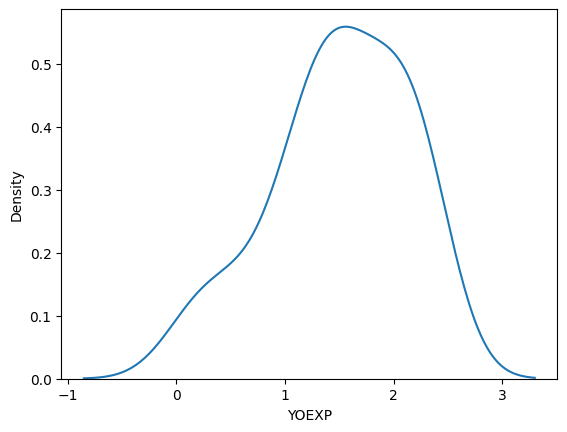

In [48]:
sns.kdeplot(new_experience)

In [50]:
model_new = smf.ols("Salary~new_experience",data).fit()
(model_new.rsquared,model_new.rsquared_adj)

(0.8538888828756969, 0.8486706286926861)

SquareRoot Transformation

<Axes: xlabel='YOEXP', ylabel='Density'>

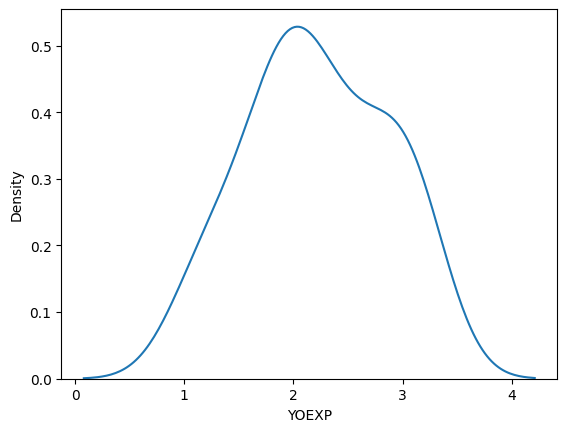

In [51]:
new_experience = np.sqrt(data["YOEXP"])
sns.kdeplot(new_experience)

In [52]:
model_sq = smf.ols("Salary~new_experience",data).fit()
(model_sq.rsquared,model_sq.rsquared_adj)

(0.9310009544993526, 0.9285367028743294)

In [53]:
data_new_1_scale = np.sqrt(data_new)
x = data_new_1_scale.iloc[:,-1]
y = data_new_1_scale.iloc[:,0]

In [54]:
model = smf.ols('y~x',data = data_new_1_scale).fit()

In [55]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           7.58e-19
Time:                        11:19:28   Log-Likelihood:                 14.149
No. Observations:                  30   AIC:                            -24.30
Df Residuals:                      28   BIC:                            -21.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1612      0.161     -7.208      0.000      -1.491      -0.831
x              0.0125      0.001     21.315      0.000       0.011       0.014
==============================================================================
Omnibus:                        1.382   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.501   Jarque-Bera (JB):                1.219
Skew:                          -0.461   Prob(JB):                        0.544
Kurtosis:                       2.646   Cond. No.                     1.56e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Exponential_Function

<Axes: xlabel='YOEXP', ylabel='Density'>

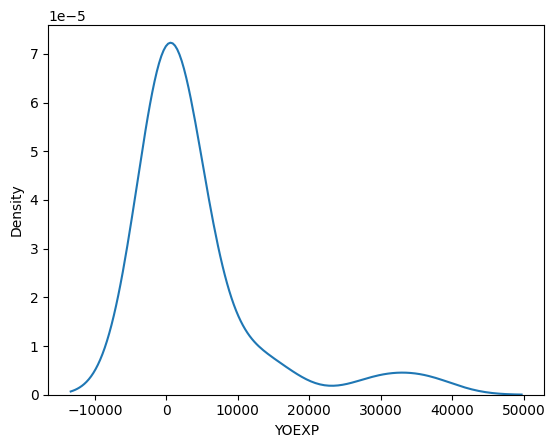

In [56]:
new_experience = np.exp(data["YOEXP"])
sns.kdeplot(new_experience)

In [57]:
model_exp = smf.ols("Salary~new_experience",data).fit()
(model_exp.rsquared,model_exp.rsquared_adj)

(0.47238440560728734, 0.45354099152183325)

In [58]:
data_new_1_scale = np.exp(data_new)
x = data_new_1_scale.iloc[:,-1]
y = data_new_1_scale.iloc[:,0]

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: overflow encountered in exp
  result = func(self.values, **kwargs)


In [60]:
model_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     25.07
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           2.72e-05
Time:                        11:32:11   Log-Likelihood:                -339.03
No. Observations:                  30   AIC:                             682.1
Df Residuals:                      28   BIC:                             684.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.757e+04   4065.396     16.620      0.000    5.92e+04    7.59e+04
new_experience     2.1360      0.427      5.007      0.000       1.262       3.010
==============================================================================
Omnibus:                        4.567   Durbin-Watson:                   0.202
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                1.966
Skew:                           0.276   Prob(JB):                        0.374
Kurtosis:                       1.874   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""